In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
pd.set_option('display.max_rows',500) 
pd.set_option('display.max_columns',500) 
pd.set_option('display.width', 1000)

In [3]:
app = pd.read_csv('application_data.csv',header=0)

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Handling missing values

Let's find the columns with more than 40% null values and remove them

In [5]:
null_cols = app.isna().sum()/len(app)>0.4

final_null = list(null_cols[null_cols==True].index)

In [6]:
# Let's drop these columns

app.drop(columns=final_null,inplace=True)

In [7]:
# Let's identify all the unwanted columns

unwanted_cols = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [8]:
# Now let's drop them

app.drop(columns=unwanted_cols,axis=1,inplace=True)

In [9]:
app.shape

(307511, 31)

In [10]:
# Listing all the categorical columns after removal

print((app.dtypes=='object').index)

print('\n\nNo. of categorical columns',len((app.dtypes=='object').index))

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')


No. of categorical columns 31


In [11]:
#Listing all the numerical columns after removal

print((app.select_dtypes(include=['float64','int64'])).columns)

print('\n\nNo. of numerical columns',len((app.select_dtypes(include=['float64','int64'])).columns))

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')


No. of numerical columns 21


#### Imputing the missing values

Let's impute the missing values with appropraite functions

In [12]:
app.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE               96391
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK  

AMT_ANNUITY

We can observe that it has outliers, Hence it may not be appropriate to use mean() as it may affect out analysis. Let's go with median

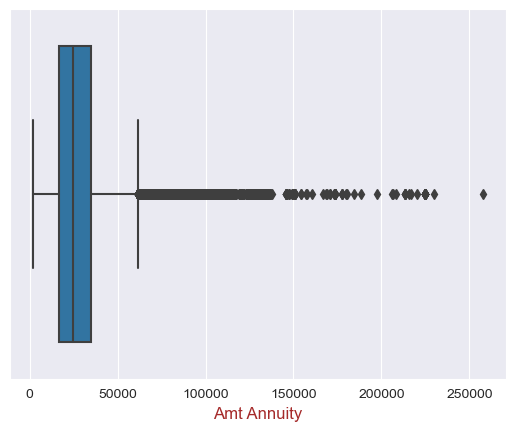

In [121]:
# Checking if AMT_ANNUITY has any outliers

sns.boxplot(data=app,x='AMT_ANNUITY')
plt.xlabel("Amt Annuity",fontsize=12,color='brown')
plt.savefig(fname='Amt annuity')
plt.show()

In [14]:
print('Median of AMT_ANNUITY column:',app.AMT_ANNUITY.median())

app.AMT_ANNUITY.fillna(app.AMT_ANNUITY.median(),inplace=True)

Median of AMT_ANNUITY column: 24903.0


AMT_GOODS_PRICE

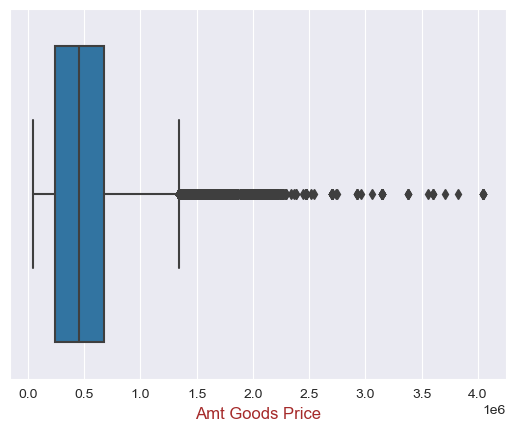

In [122]:
# Checking if AMT_GOODS_PRICE has any outliers

sns.boxplot(data=app,x='AMT_GOODS_PRICE')
plt.xlabel("Amt Goods Price",fontsize=12,color='brown')
plt.savefig(fname='Amt Goods Price')
plt.show()

In [16]:
print('Median of AMT_GOODS_PRICE column:',app.AMT_GOODS_PRICE.median())

app.AMT_GOODS_PRICE.fillna(app.AMT_GOODS_PRICE.median(),inplace=True)

Median of AMT_GOODS_PRICE column: 450000.0


OCCUPATION_TYPE

If we check the null values in this column, we can observe that the count fo null values is more than then most popular occupation type. Hence it is better to name it as 'Unknown' so that it won't affect out analysis

In [17]:
app.OCCUPATION_TYPE.fillna('Unknown',inplace=True)

EXT_SOURCE_2

There are no outliers. Hence it is appropriate to use mean here as it will not affect our analysis

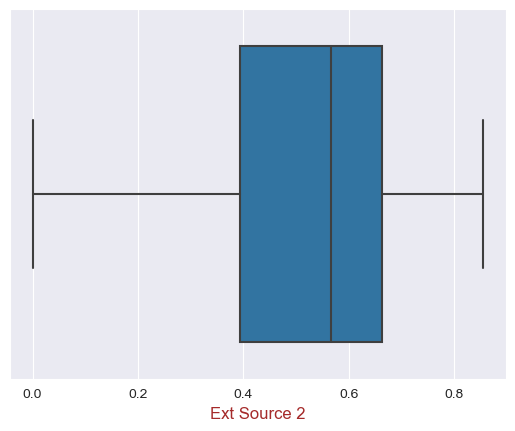

In [124]:
sns.boxplot(data=app,x="EXT_SOURCE_2")
plt.xlabel("Ext Source 2",fontsize=12,color='brown')
plt.savefig(fname='Ext_Source_2')
plt.show()

In [19]:
print('Mean of EXT_SOURCE_2 column:',round(app.EXT_SOURCE_2.mean(),2))

app.EXT_SOURCE_2.fillna(round(app.EXT_SOURCE_2.mean(),2),inplace=True)

Mean of EXT_SOURCE_2 column: 0.51


EXT_SOURCE_3

There are no outliers. Hence it is appropriate to use mean here as it will not affect our analysis

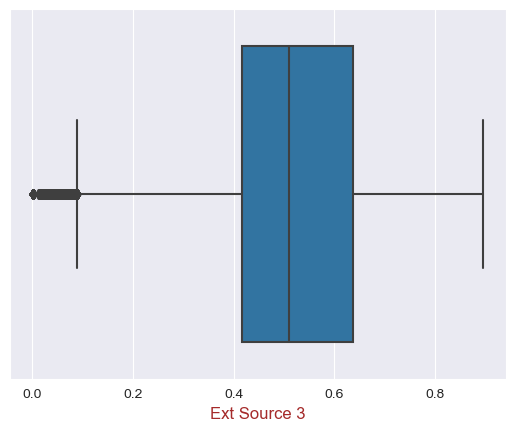

In [125]:
sns.boxplot(data=app,x='EXT_SOURCE_3')
plt.xlabel("Ext Source 3",fontsize=12,color='brown')
plt.savefig(fname='ext_source_3')
plt.show()

In [21]:
print('Mean of EXT_SOURCE_3 column:',round(app.EXT_SOURCE_3.mean(),2))

app.EXT_SOURCE_3.fillna(round(app.EXT_SOURCE_3.mean(),2),inplace=True)

Mean of EXT_SOURCE_3 column: 0.51


In [22]:
app.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                   0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                      0
EXT_SOURCE_3                      0
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK  

AMT_REQ_CREDIT_BUREAU_HOUR

We can observe outliers here. Let's impute median()

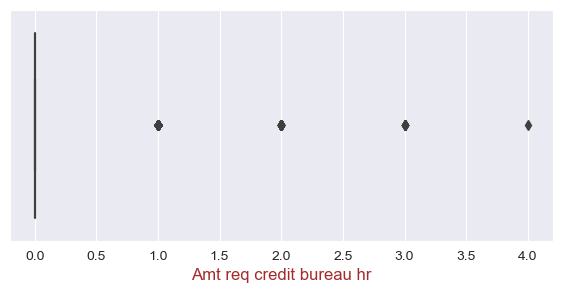

In [126]:
plt.figure(figsize=[7,3])
sns.boxplot(data=app,x='AMT_REQ_CREDIT_BUREAU_HOUR')
plt.xlabel("Amt req credit bureau hr",fontsize=12,color='brown')
plt.savefig(fname='Amt req credit bureau hr')
plt.show()


In [24]:
print("Median of AMT_REQ_CREDIT_BUREAU_HOUR column: ",round(app.AMT_REQ_CREDIT_BUREAU_HOUR.median(),2))

app.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(round(app.AMT_REQ_CREDIT_BUREAU_HOUR.median(),2),inplace=True)

Median of AMT_REQ_CREDIT_BUREAU_HOUR column:  0.0


AMT_REQ_CREDIT_BUREAU_DAY

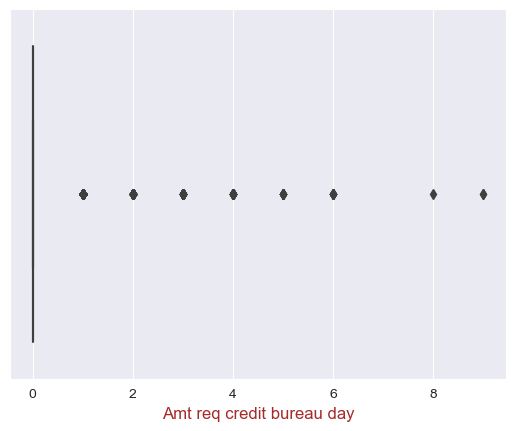

In [127]:
sns.boxplot(data=app,x='AMT_REQ_CREDIT_BUREAU_DAY')
plt.xlabel("Amt req credit bureau day",fontsize=12,color='brown')
plt.savefig(fname='Amt req credit bureau day')
plt.show()

In [26]:
print("Median of AMT_REQ_CREDIT_BUREAU_DAY column: ",round(app.AMT_REQ_CREDIT_BUREAU_DAY.median(),2))

app.AMT_REQ_CREDIT_BUREAU_DAY.fillna(round(app.AMT_REQ_CREDIT_BUREAU_DAY.median(),2),inplace=True)

Median of AMT_REQ_CREDIT_BUREAU_DAY column:  0.0


AMT_REQ_CREDIT_BUREAU_WEEK

We can observe outliers here. Let's impute median()

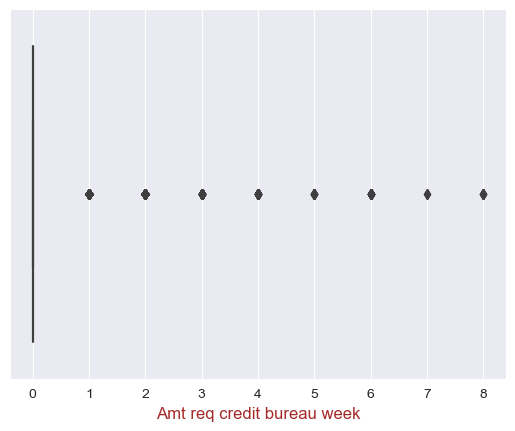

In [128]:
sns.boxplot(data=app,x='AMT_REQ_CREDIT_BUREAU_WEEK')
plt.xlabel("Amt req credit bureau week",fontsize=12,color='brown')
plt.savefig(fname='Amt req credit bureau week')
plt.show()

In [28]:
print("Median of AMT_REQ_CREDIT_BUREAU_WEEK column: ",round(app.AMT_REQ_CREDIT_BUREAU_WEEK.median(),2))

app.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(round(app.AMT_REQ_CREDIT_BUREAU_WEEK.median(),2),inplace=True)

Median of AMT_REQ_CREDIT_BUREAU_WEEK column:  0.0


AMT_REQ_CREDIT_BUREAU_QRT

We can observe outliers here. Let's impute median()

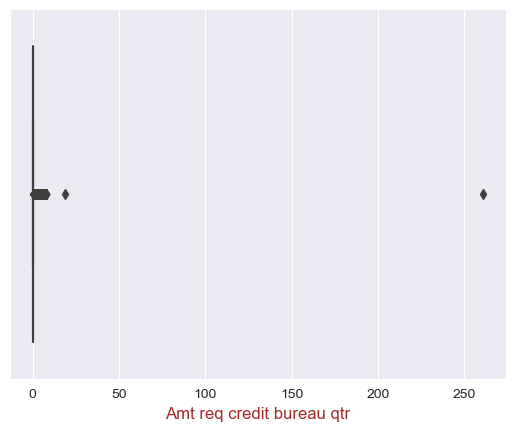

In [129]:
sns.boxplot(data=app,x='AMT_REQ_CREDIT_BUREAU_QRT')
plt.xlabel("Amt req credit bureau qtr",fontsize=12,color='brown')
plt.savefig(fname='Amt req credit bureau qtr')
plt.show()

In [30]:
print("Median of AMT_REQ_CREDIT_BUREAU_QRT column: ",round(app.AMT_REQ_CREDIT_BUREAU_QRT.median(),2))

app.AMT_REQ_CREDIT_BUREAU_QRT.fillna(round(app.AMT_REQ_CREDIT_BUREAU_QRT.median(),2),inplace=True)

Median of AMT_REQ_CREDIT_BUREAU_QRT column:  0.0


AMT_REQ_CREDIT_BUREAU_YEAR

We can observe outliers here. Let's impute median()

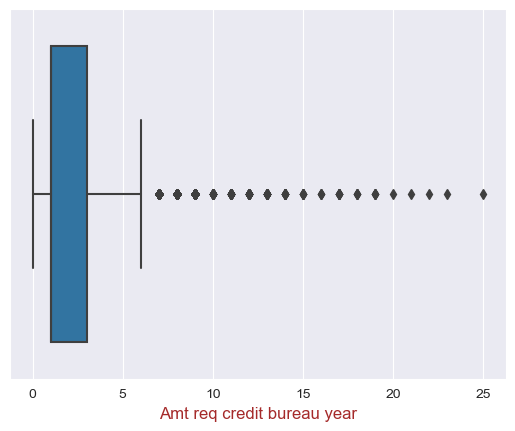

In [130]:
sns.boxplot(data=app,x='AMT_REQ_CREDIT_BUREAU_YEAR')
plt.xlabel("Amt req credit bureau year",fontsize=12,color='brown')
plt.savefig(fname='Amt req credit bureau year')
plt.show()

In [32]:
print("Median of AMT_REQ_CREDIT_BUREAU_YEAR column: ",round(app.AMT_REQ_CREDIT_BUREAU_YEAR.median(),2))

app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(round(app.AMT_REQ_CREDIT_BUREAU_YEAR.median(),2),inplace=True)

Median of AMT_REQ_CREDIT_BUREAU_YEAR column:  1.0


AMT_REQ_CREDIT_BUREAU_MON

We can observe outliers here. Let's impute median()

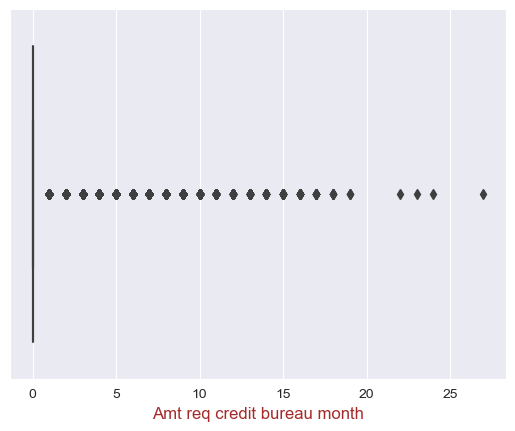

In [131]:
sns.boxplot(data=app,x='AMT_REQ_CREDIT_BUREAU_MON')
plt.xlabel("Amt req credit bureau month",fontsize=12,color='brown')
plt.savefig(fname='Amt req credit bureau mon')
plt.show()

In [34]:
print("Median of AMT_REQ_CREDIT_BUREAU_MON column: ",round(app.AMT_REQ_CREDIT_BUREAU_MON.median(),2))

app.AMT_REQ_CREDIT_BUREAU_MON.fillna(round(app.AMT_REQ_CREDIT_BUREAU_MON.median(),2),inplace=True)

Median of AMT_REQ_CREDIT_BUREAU_MON column:  0.0


In [35]:
app.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
REG_REGION_NOT_LIVE_REGION    0
REG_REGION_NOT_WORK_REGION    0
ORGANIZATION_TYPE             0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: i

### There is an error in few columns, let's correct them

In [36]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-2994.202373,0.015144,0.050769,5.143832e-01,0.510684,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,1509.450419,0.122126,0.219526,1.908551e-01,0.174465,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-4299.000000,0.000000,0.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-3254.000000,0.000000,0.000000,5.654672e-01,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-1720.000000,0.000000,0.000000,6.634218e-01,0.636376,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,1.000000,1.000000,8.549997e-01,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


We can see that DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH has values in negative. We will convert them to positive values and into years

In [37]:
app["AGE"] = abs(app.DAYS_BIRTH)/365
app['YEARS_EMPLOYED'] = abs(app.DAYS_EMPLOYED)/365
app['YEARS_ID_PUBLISH'] = abs(app.DAYS_ID_PUBLISH)/365

In [38]:
# Now let's delete DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH

app.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH'],inplace=True)

In [39]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Laborers,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,5.808219
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,Core staff,0,0,School,0.622246,0.510000,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,0.797260
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Laborers,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,6.934247
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,Laborers,0,0,Business Entity Type 3,0.650442,0.510000,0.0,0.0,0.0,0.0,0.0,1.0,52.068493,8.326027,6.676712
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,Core staff,0,0,Religion,0.322738,0.510000,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,9.473973


## Data Imbalance

#### Let's check the Target column

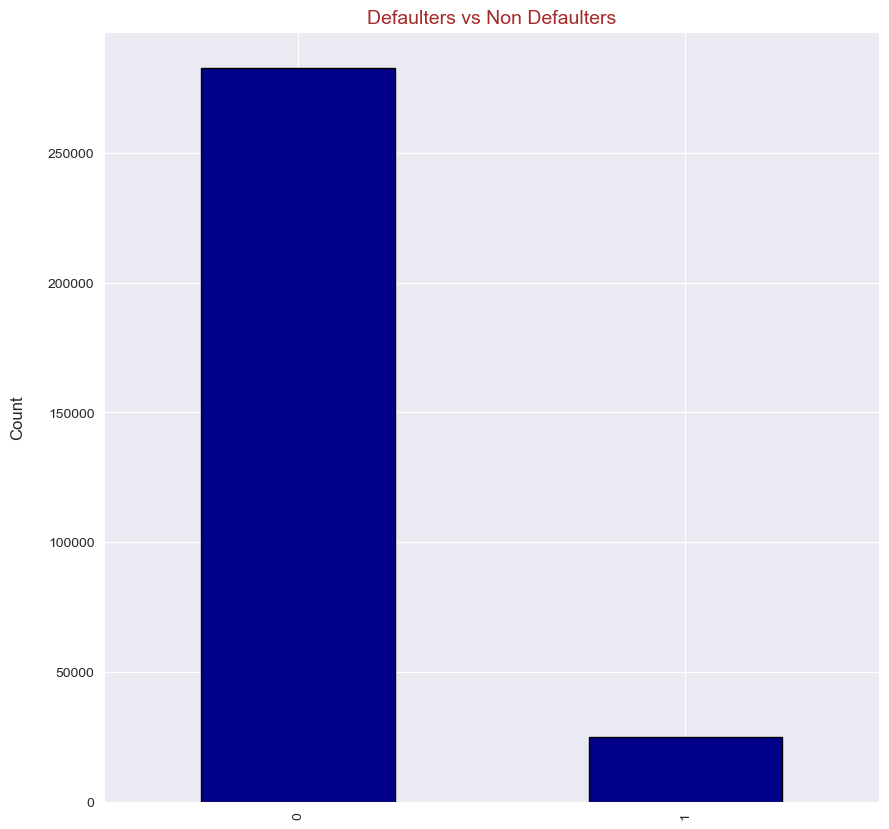

In [136]:
plt.figure(figsize=[10,10])
app.TARGET.value_counts().plot(kind='bar',color='darkblue',edgecolor='black')
plt.title('Defaulters vs Non Defaulters',fontdict={'fontsize': 14,'color':'brown'})
plt.ylabel('Count\n',fontsize=12)
plt.savefig(fname='Data Imbalance')
plt.show()

In [41]:
app.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Almost 92% are defaulters and only about 8 % are not defaulters

### CODE_GENDER

In [42]:
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [43]:
# XNAs might be something the user may not be willing to reveal, But to simplify our analysis let's impute this as F

app.CODE_GENDER.replace({'XNA':'F'},regex=True,inplace=True)

In [44]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Laborers,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,5.808219
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,Core staff,0,0,School,0.622246,0.510000,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,0.797260
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Laborers,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,6.934247
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,Laborers,0,0,Business Entity Type 3,0.650442,0.510000,0.0,0.0,0.0,0.0,0.0,1.0,52.068493,8.326027,6.676712
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,Core staff,0,0,Religion,0.322738,0.510000,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,9.473973


In [45]:
app.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

## Univariate Analysis

#### NAME_CONTRACT_TYPE

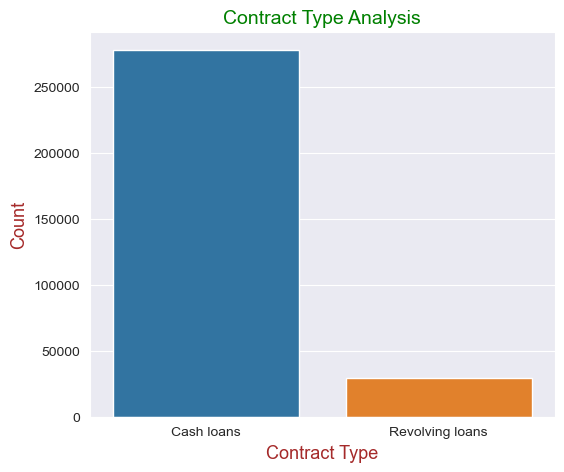

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize=[6,5])
sns.countplot(data=app,x='NAME_CONTRACT_TYPE')
plt.xlabel('Contract Type',fontsize=13,color='brown')
plt.ylabel('Count',fontsize=13,color='brown')
plt.title('Contract Type Analysis',fontsize=14,color='g')
plt.show()

#### NAME_INCOME_TYPE

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


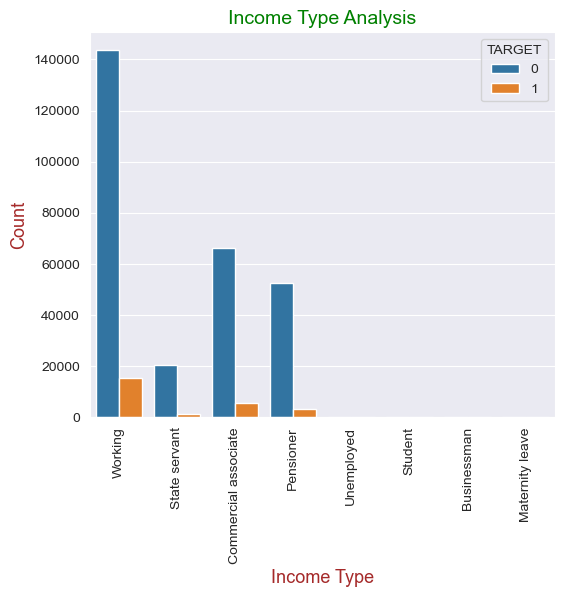

In [139]:
print(app.NAME_INCOME_TYPE.value_counts(normalize=True))
plt.figure(figsize=[6,5])
sns.countplot(data=app,x='NAME_INCOME_TYPE',hue='TARGET')
plt.xlabel('Income Type',fontsize=13,color='brown')
plt.ylabel('Count',fontsize=13,color='brown')
plt.title('Income Type Analysis',fontsize=14,color='g')
plt.xticks(rotation=90)
plt.savefig(fname='Income Analysis')
plt.show()

Working class accounts for almost 51% of the data, followed by commercial associates with 23% and pensioner with 18%. 

#### NAME_EDUCATION_TYPE

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


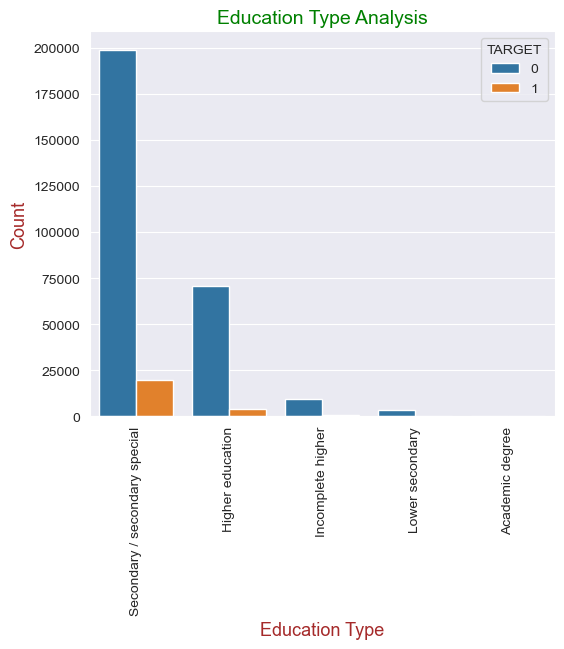

In [138]:
print(app.NAME_EDUCATION_TYPE.value_counts(normalize=True))
plt.figure(figsize=[6,5])
sns.countplot(data=app,x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.xlabel('Education Type',fontsize=13,color='brown')
plt.ylabel('Count',fontsize=13,color='brown')
plt.title('Education Type Analysis',fontsize=14,color='g')
plt.xticks(rotation=90)
plt.show()

Observations
1. Most people applied for a loan falls under Secondary / Secondary Education type which constitues upto 71%
2. People with an Academic degree are less likely to be defaulters

#### NAME_FAMILY_STATUS

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


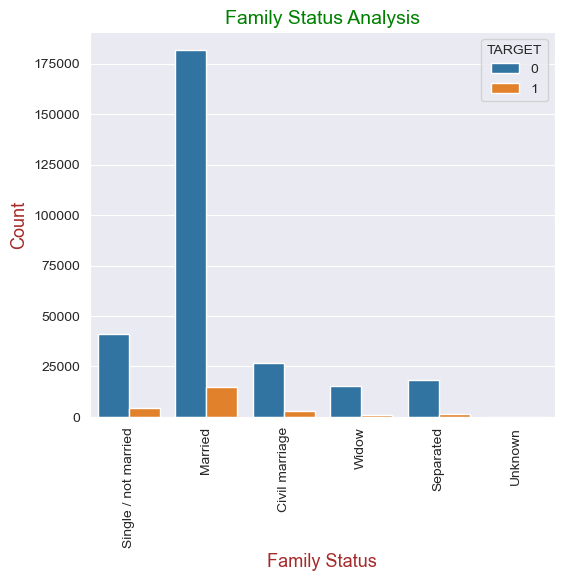

In [106]:
print(app.NAME_FAMILY_STATUS.value_counts(normalize=True))
plt.figure(figsize=[6,5])
sns.countplot(data=app,x='NAME_FAMILY_STATUS',hue='TARGET')
plt.xlabel('Family Status',fontsize=13,color='brown')
plt.ylabel('Count',fontsize=13,color='brown')
plt.title('Family Status Analysis',fontsize=14,color='g')
plt.xticks(rotation=90)
plt.show()

Oservations
1. Maximum people applied for a loan are married with a percentage of 64%
2. Married clients are more likely to default and Widow clients are less likely to default

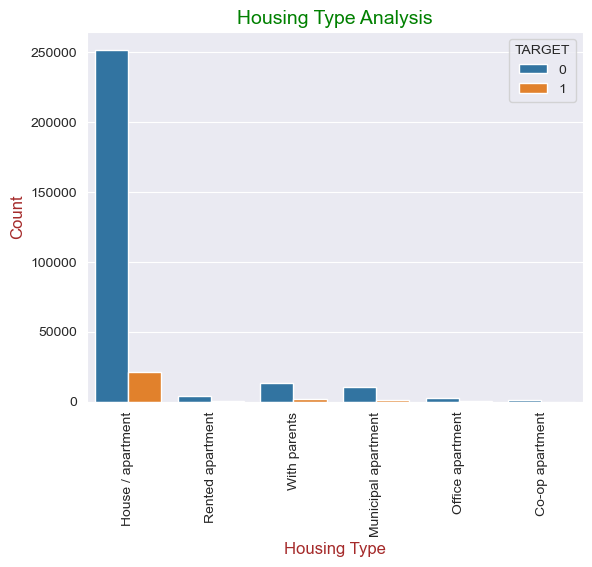

In [110]:
sns.countplot(data=app,x='NAME_HOUSING_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.xlabel("Housing Type",fontsize=12,color='brown')
plt.ylabel("Count",fontsize=12,color='brown')
plt.title("Housing Type Analysis",fontsize=14,color='g')
plt.show()

Conclusions
1. People living in a house or apartments are the highest defaulters
2. People living in a muncipal apartment, office apartment and rented apartments are the least defaulters

#### Let's divide the target column into defaulters and non defaulters to make our analysis easy

In [50]:
d = app[app.TARGET==1]

In [51]:
nd = app[app.TARGET==0]

Let's analyze the CODE_GENDER column

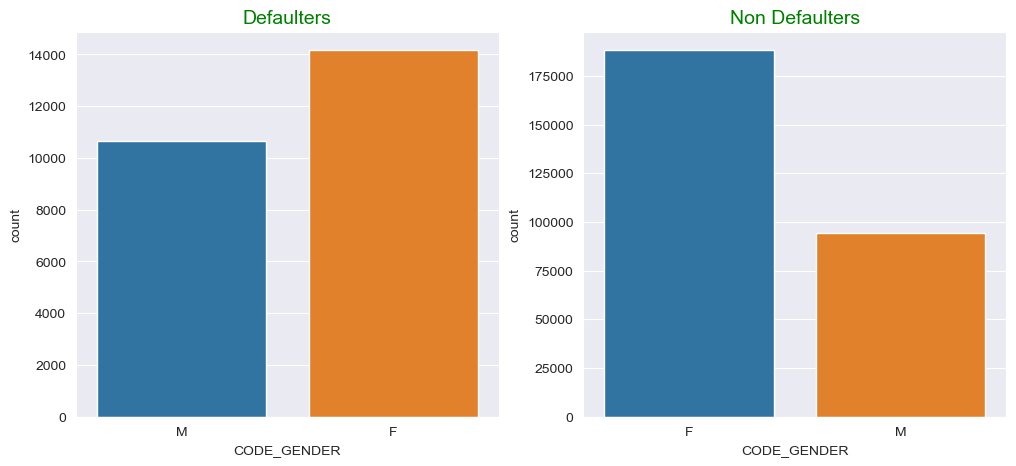

In [52]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12, 5)
sns.countplot(ax=axes[0],data=d,x='CODE_GENDER')
axes[0].set_title('Defaulters',fontsize=14,color='g')


sns.countplot(ax=axes[1],data=nd,x='CODE_GENDER')
axes[1].set_title('Non Defaulters',fontsize=14,color='green')
plt.show()

Important Points:
1. Females are the highest defaulters and Non defaulters

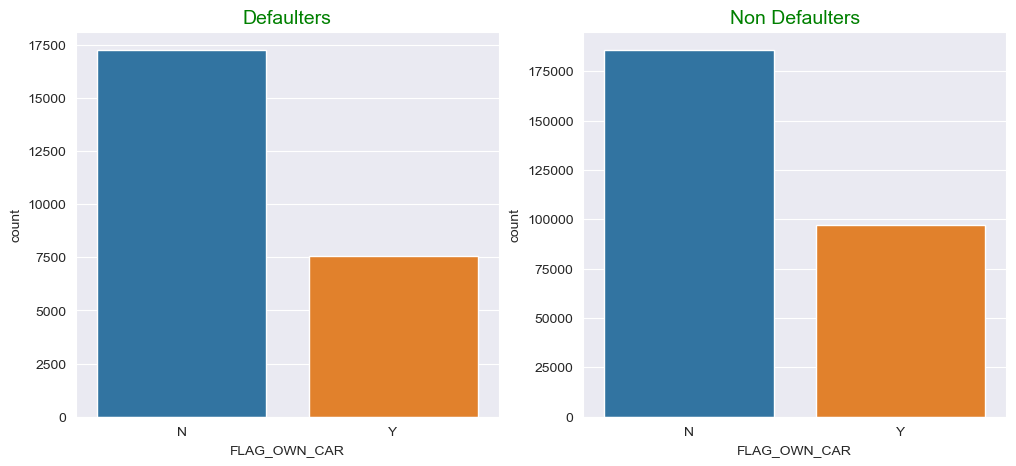

In [53]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12, 5)
sns.countplot(ax=axes[0],data=d,x='FLAG_OWN_CAR')
axes[0].set_title('Defaulters',fontsize=14,color='g')


sns.countplot(ax=axes[1],data=nd,x='FLAG_OWN_CAR')
axes[1].set_title('Non Defaulters',fontsize=14,color='green')
plt.show()

Important point
1. Most defaulters do not own a car

In [54]:
# Let's create bins for AMT_INCOME_TOTAL

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,120000000]

l = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']

app["income_range"] = pd.cut(app['AMT_INCOME_TOTAL'],bins,labels=l) 

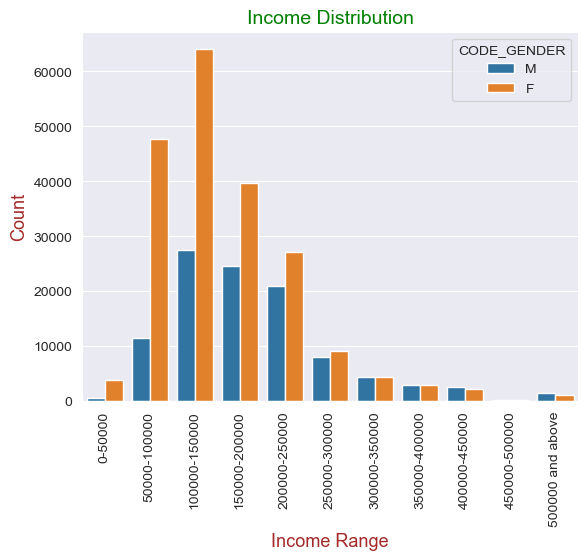

In [55]:
sns.countplot(data=app,x='income_range',hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.xlabel("Income Range",fontsize=13,color='brown')
plt.ylabel("Count",fontsize=13,color='brown')
plt.title("Income Distribution",fontsize=14,color='g')
plt.show()

Important points:
1. Females have higher income than men
2. People with income ranging from 100000 to 150000 is higher in number
3. Very less number of people having the income of 35000 and above

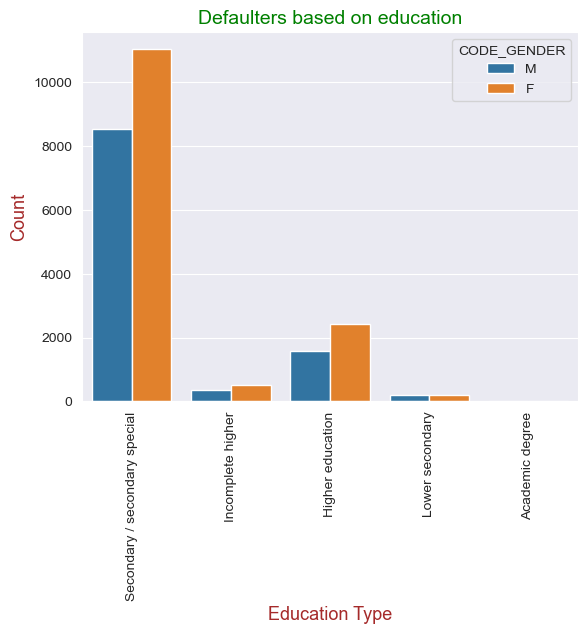

In [56]:
sns.countplot(data=d,x='NAME_EDUCATION_TYPE',hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.xlabel('Education Type',fontsize=13,color='brown')
plt.ylabel("Count",fontsize=13,color='brown')
plt.title("Defaulters based on education",fontsize=14,color='green')
plt.show()

Important points
1. People who have completed Secondary / Secondary special are the highest defaulters
2. people who have an academic degree are the lowest defaulters

### Age 

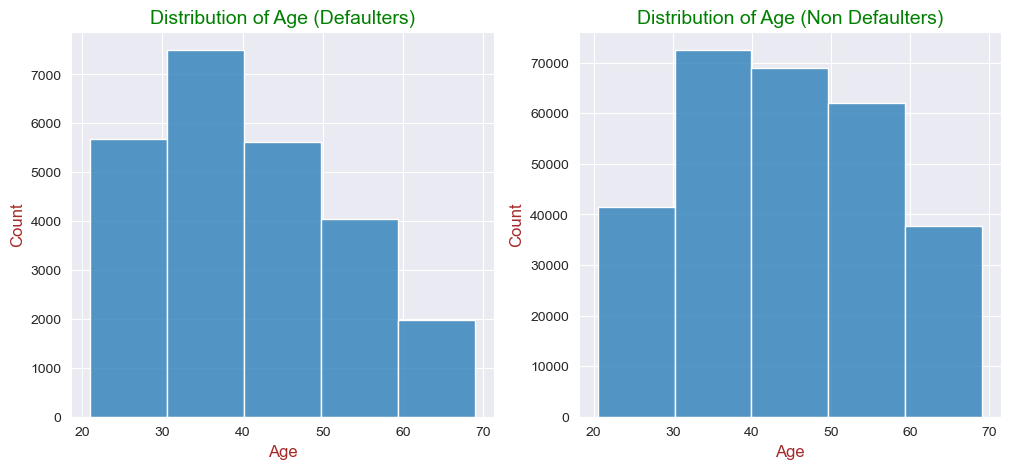

In [57]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12, 5)
sns.histplot(ax=ax[0],data=d,x='AGE',bins=5)
ax[0].set_xlabel("Age",fontsize=12,color='brown')
ax[0].set_ylabel("Count",fontsize=12,color='brown')
ax[0].set_title("Distribution of Age (Defaulters)",fontsize=14,color='green')

sns.histplot(ax=ax[1],data=nd,x="AGE",bins=5)
plt.xlabel("Age",fontsize=12,color='brown')
plt.ylabel("Count",fontsize=12,color='brown')
plt.title("Distribution of Age (Non Defaulters)",fontsize=14,color='green')

plt.show()

Important points
1. People who are aged 30 to 40 are the highest defaulters and Non defaulters
2. People who are aged 40 to 60 are the highest non defaulters

#### Let's check the Organization type that has lowest defaulters

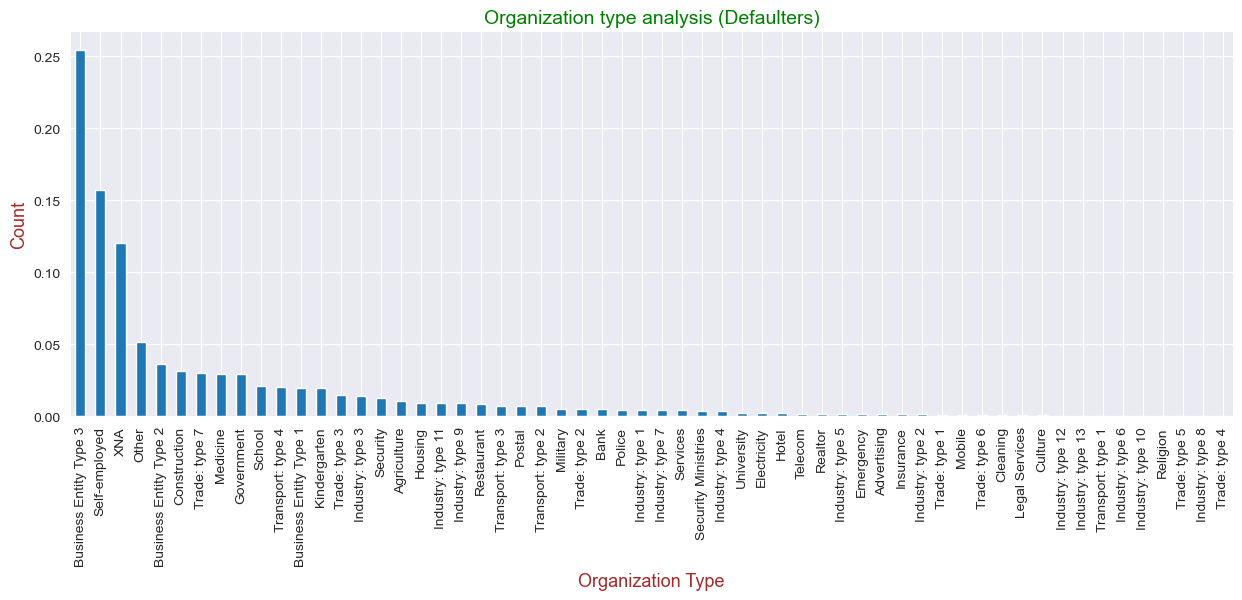

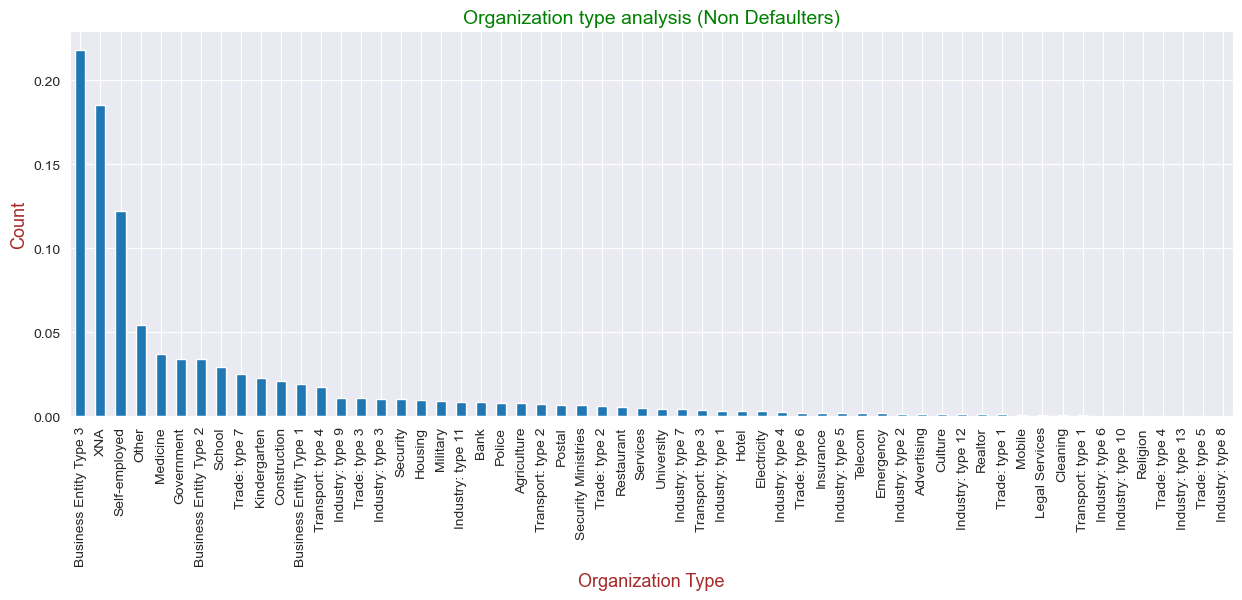

In [58]:
plt.figure(figsize=[15,5])
d.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xlabel('Organization Type',fontsize=13,color='brown')
plt.ylabel("Count",fontsize=13,color='brown')
plt.title("Organization type analysis (Defaulters)",fontsize=14,color='green')
plt.show()



plt.figure(figsize=[15,5])
nd.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xlabel('Organization Type',fontsize=13,color='brown')
plt.ylabel("Count",fontsize=13,color='brown')
plt.title("Organization type analysis (Non Defaulters)",fontsize=14,color='green')
plt.show()

Important points
1. Business Entity Type3 has the highest number of defaulters and non defaulters

#### OCCUPATION_TYPE

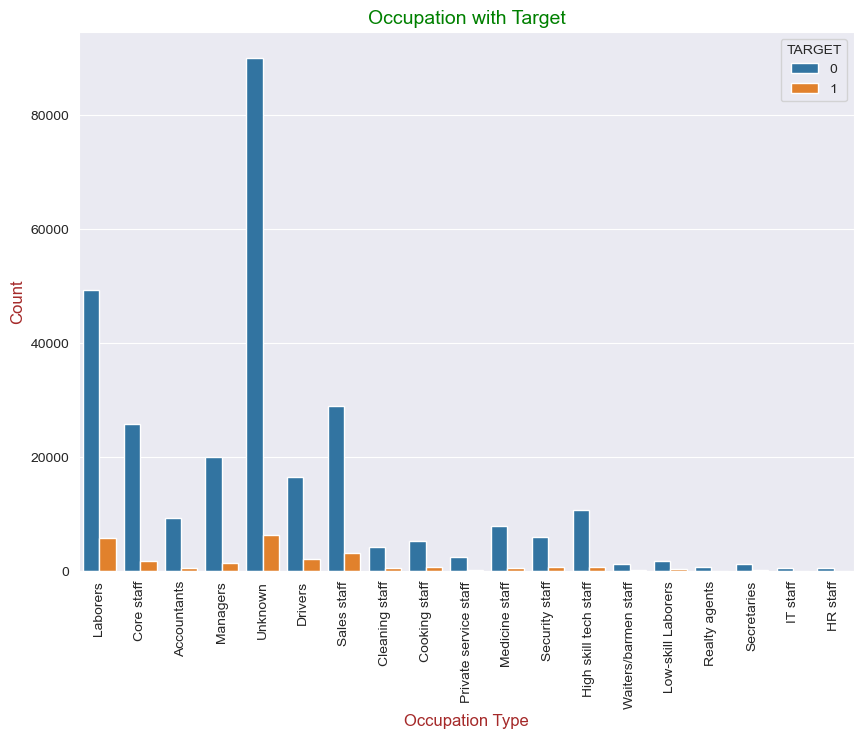

In [112]:
plt.figure(figsize=[10,7])
sns.countplot(data=app,x='OCCUPATION_TYPE',hue='TARGET')
plt.xlabel("Occupation Type",fontsize=12,color='brown')
plt.ylabel("Count",fontsize=12,color='brown')
plt.title("Occupation with Target",fontsize=14,color='g')
plt.xticks(rotation=90)
plt.show()

Important Points:

1. Managers,Accountants, High skill tech staff are likely to be Non defaulters

#### NAME_HOUSING_TYPE

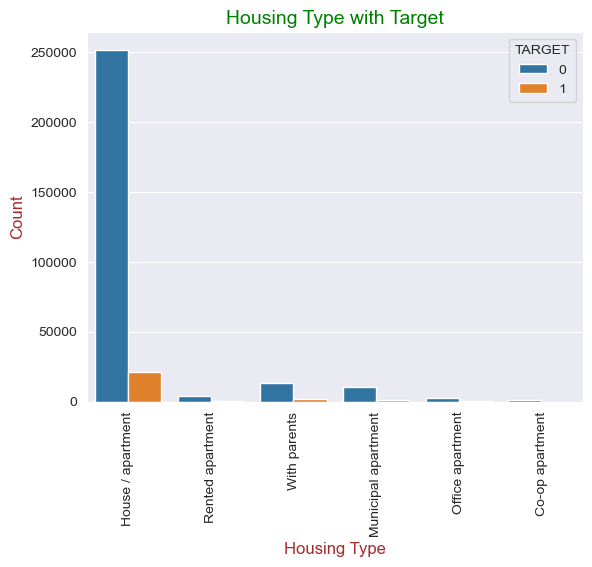

In [113]:
sns.countplot(data=app,x='NAME_HOUSING_TYPE',hue='TARGET')
plt.xlabel("Housing Type",fontsize=12,color='brown')
plt.ylabel("Count",fontsize=12,color='brown')
plt.title("Housing Type with Target",fontsize=14,color='g')
plt.xticks(rotation=90)
plt.show()

Important Points
1. Housing type of most defaulters are Houses/ Apartments
2. Clients living in rented apartments and muncipal apartments tend to be non defaulters

### Bivariate Analysis

Let's first analyze the numerical columns

AMT_GOODS_PRICE vs AMT_CREDIT

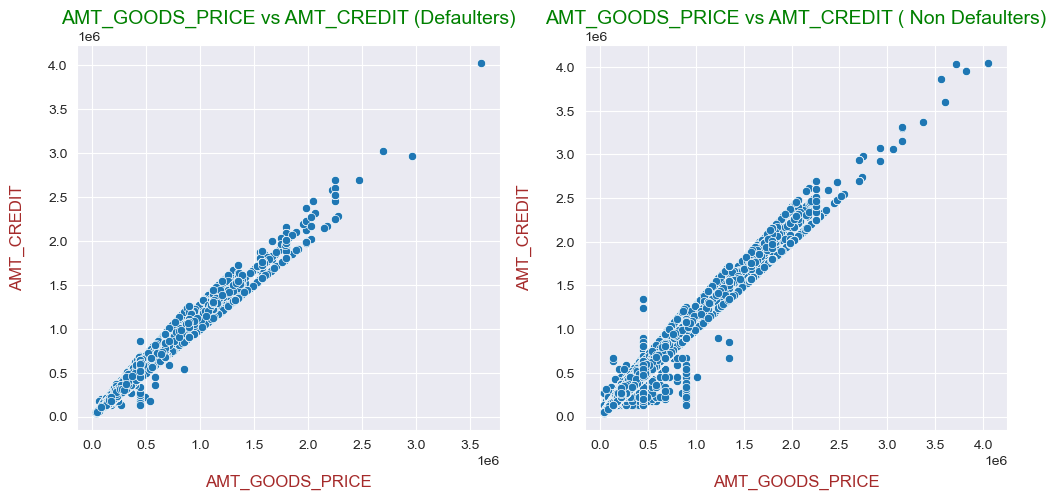

In [61]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12, 5)
sns.scatterplot(ax=ax[0],data=d,x='AMT_GOODS_PRICE',y='AMT_CREDIT')
ax[0].set_xlabel("\nAMT_GOODS_PRICE",fontsize=12,color='brown')
ax[0].set_ylabel("AMT_CREDIT\n",fontsize=12,color='brown')
ax[0].set_title("AMT_GOODS_PRICE vs AMT_CREDIT (Defaulters)",fontsize=14,color='green')

sns.scatterplot(ax=ax[1],data=nd,x='AMT_GOODS_PRICE',y='AMT_CREDIT')
ax[1].set_xlabel("\nAMT_GOODS_PRICE",fontsize=12,color='brown')
ax[1].set_ylabel("AMT_CREDIT\n",fontsize=12,color='brown')
ax[1].set_title("AMT_GOODS_PRICE vs AMT_CREDIT ( Non Defaulters)",fontsize=14,color='green')

plt.show()

Important Points
1. We can observe a positive correlation between AMT_CREDIT and AMT_GOODS_PRICE
2. The credit amount is higher when the price of the goods for which the loan is given for increases

AMT_CREDIT vs AMT_ANNUITY

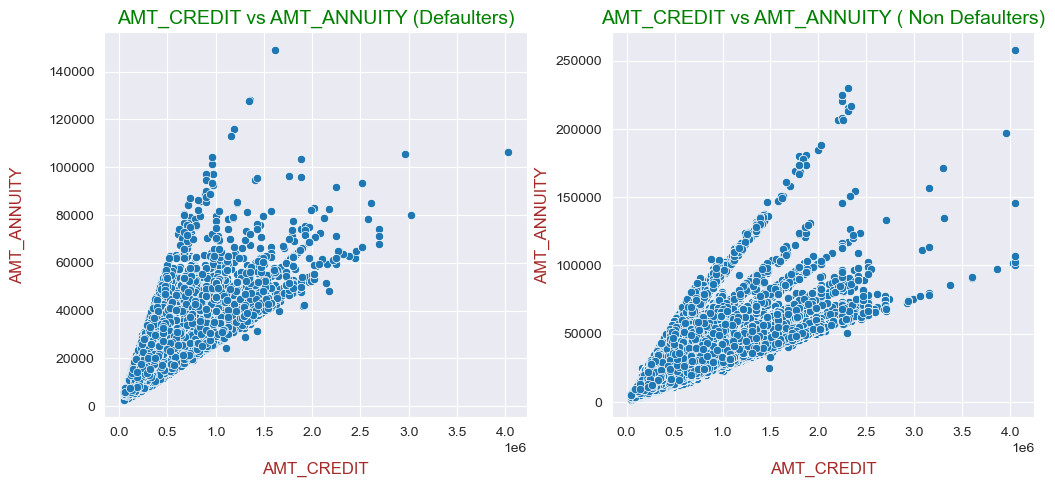

In [62]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12, 5)
sns.scatterplot(ax=ax[0],data=d,x='AMT_CREDIT',y='AMT_ANNUITY')
ax[0].set_xlabel("\nAMT_CREDIT",fontsize=12,color='brown')
ax[0].set_ylabel("AMT_ANNUITY\n",fontsize=12,color='brown')
ax[0].set_title("AMT_CREDIT vs AMT_ANNUITY (Defaulters)",fontsize=14,color='green')

sns.scatterplot(ax=ax[1],data=nd,x='AMT_CREDIT',y='AMT_ANNUITY')
ax[1].set_xlabel("\nAMT_CREDIT",fontsize=12,color='brown')
ax[1].set_ylabel("AMT_ANNUITY",fontsize=12,color='brown')
ax[1].set_title("AMT_CREDIT vs AMT_ANNUITY ( Non Defaulters)",fontsize=14,color='green')

plt.show()

Observations
1. There is a strong correlation between AMT_CREDIT and AMT_ANNUITY
2. Higher the credit ammount results in higher the credit ammount

CNT_CHILDREN vs TARGET_SUM

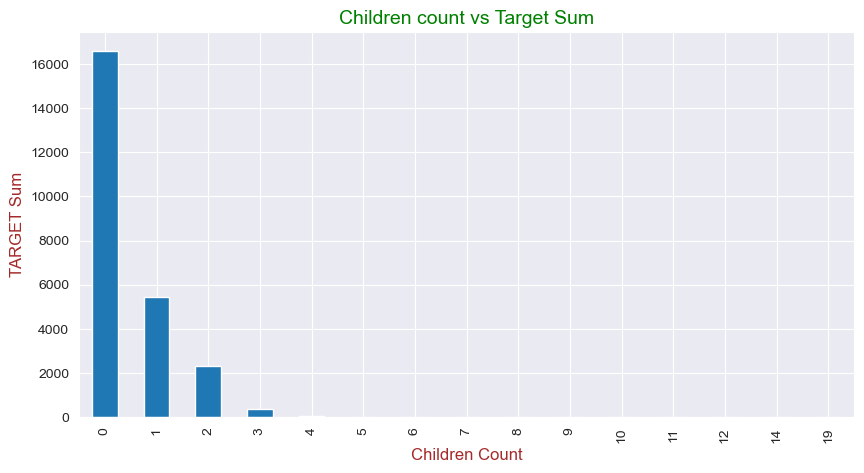

In [64]:
plt.figure(figsize=[10,5])
res = app.groupby(by='CNT_CHILDREN')["TARGET"].sum().plot.bar()
plt.xlabel('Children Count',fontsize=12,color='brown')
plt.ylabel('TARGET Sum',fontsize=12,color='brown')
plt.title("Children count vs Target Sum",fontsize=14,color='green')
plt.show()

Observations

1. People with 0 childern count has the highest defaulters
2. People with higher children count (more than 6) have no Defaulters

income_range vs CNT_CHILDREN

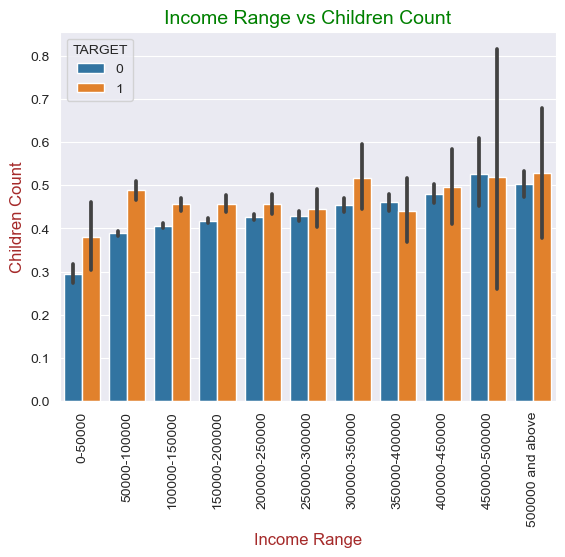

In [65]:
sns.barplot(data=app,x='income_range',y='CNT_CHILDREN',hue='TARGET')
plt.xticks(rotation=90)
plt.xlabel("Income Range",fontsize=12,color='brown')
plt.ylabel("Children Count",fontsize=12,color='brown')
plt.title("Income Range vs Children Count",fontsize=14,color='green')
plt.show()

Observations:
1. People with higher children count tend to have better income, but higher the income, higher the defaulting rate. Hence we can issue loan with less credit ammount so that it would be easier for them to pay on time

income_range vs AMT_CREDIT

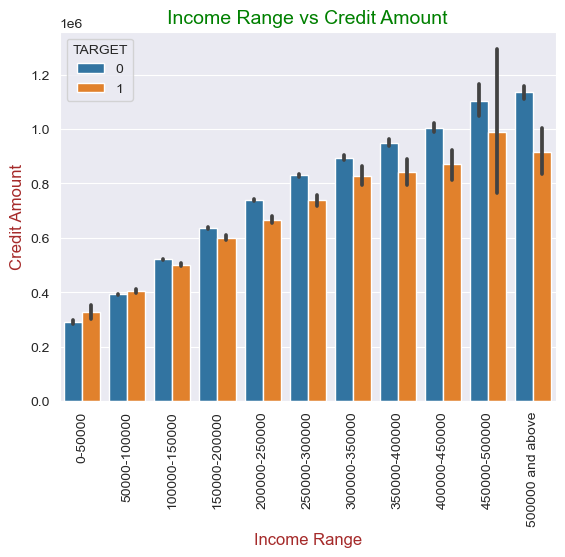

In [66]:
sns.barplot(data=app,x='income_range',y='AMT_CREDIT',hue='TARGET')
plt.xticks(rotation=90)
plt.xlabel("Income Range",fontsize=12,color='brown')
plt.ylabel("Credit Amount",fontsize=12,color='brown')
plt.title("Income Range vs Credit Amount",fontsize=14,color='green')
plt.show()


Observations:
1. People with higher income range are less likely to default whereas people with low income range are more likely to default
2. People with income range 500000 and above are the highest Non defaulters

#### Categorical vs Numerical Columns

NAME_EDUCATION_TYPE vs AMT_CREDIT

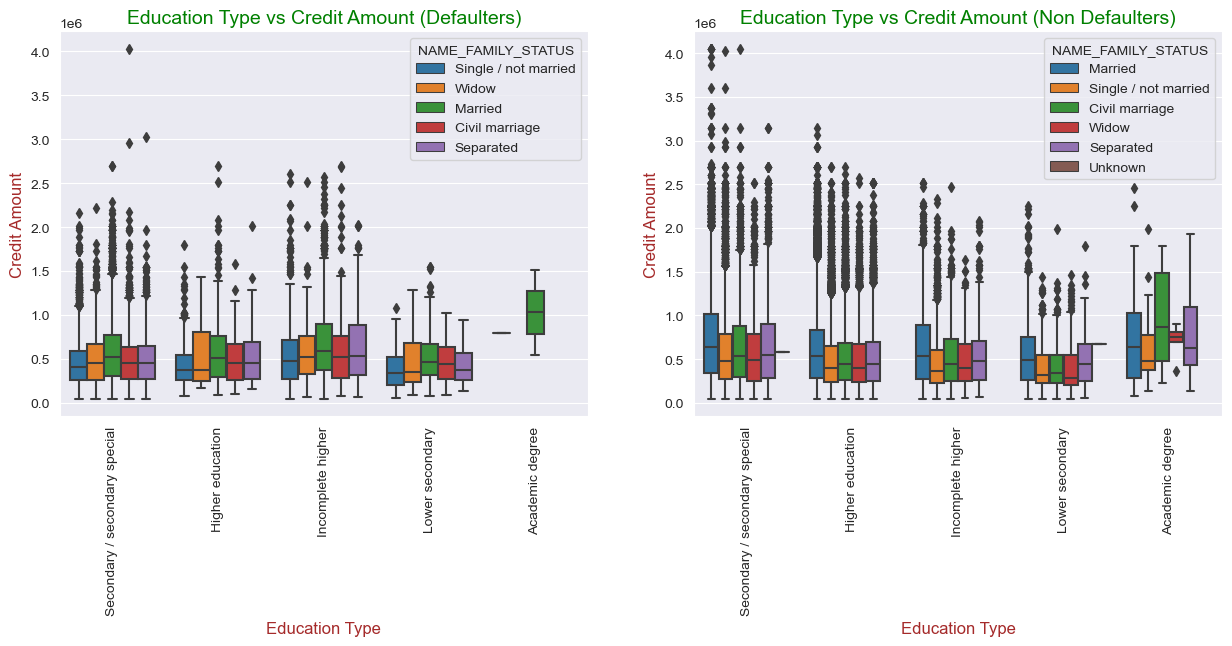

In [67]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15, 5)
sns.boxplot(ax=ax[0],data=d,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS')
ax[0].set_xticklabels(labels = app['NAME_EDUCATION_TYPE'].value_counts().index,rotation=90)
ax[0].set_ylabel('Credit Amount',fontsize=12,color='brown')
ax[0].set_xlabel('Education Type',fontsize=12,color='brown')
ax[0].set_title('Education Type vs Credit Amount (Defaulters)',fontsize=14,color='green')


sns.boxplot(ax=ax[1],data=nd,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS')
ax[1].set_ylabel('Credit Amount',fontsize=12,color='brown')
ax[1].set_xlabel('Education Type',fontsize=12,color='brown')
ax[1].set_title('Education Type vs Credit Amount (Non Defaulters)',fontsize=14,color='green')
ax[1].set_xticklabels(labels = app['NAME_EDUCATION_TYPE'].value_counts().index,rotation=90)
plt.show()

Observations
1. People having an academic degree have higher credit than the rest of the categories

OCCUPATION_TYPE vs AMT_CREDIT

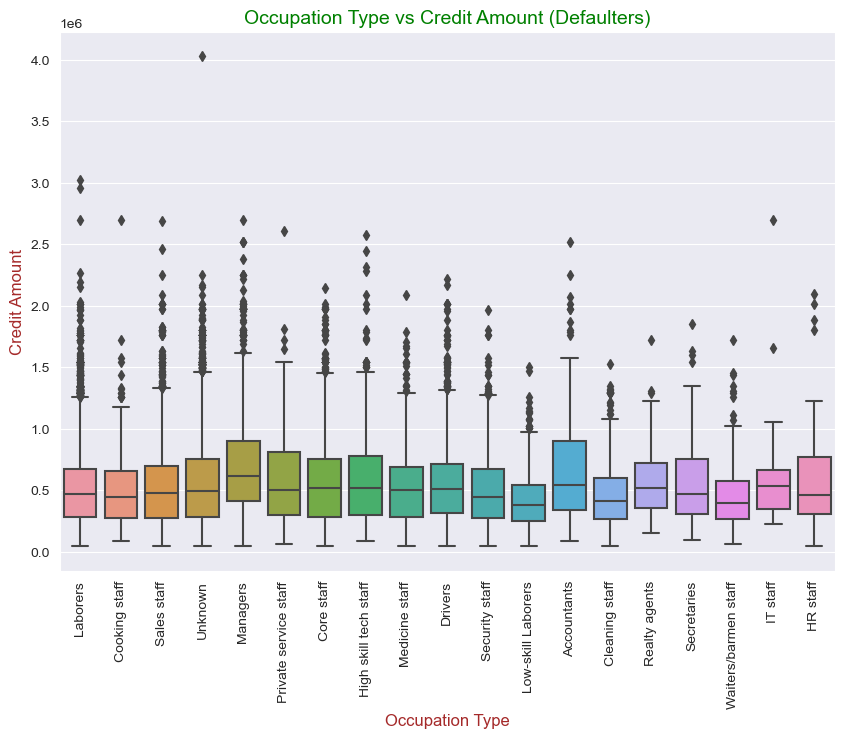

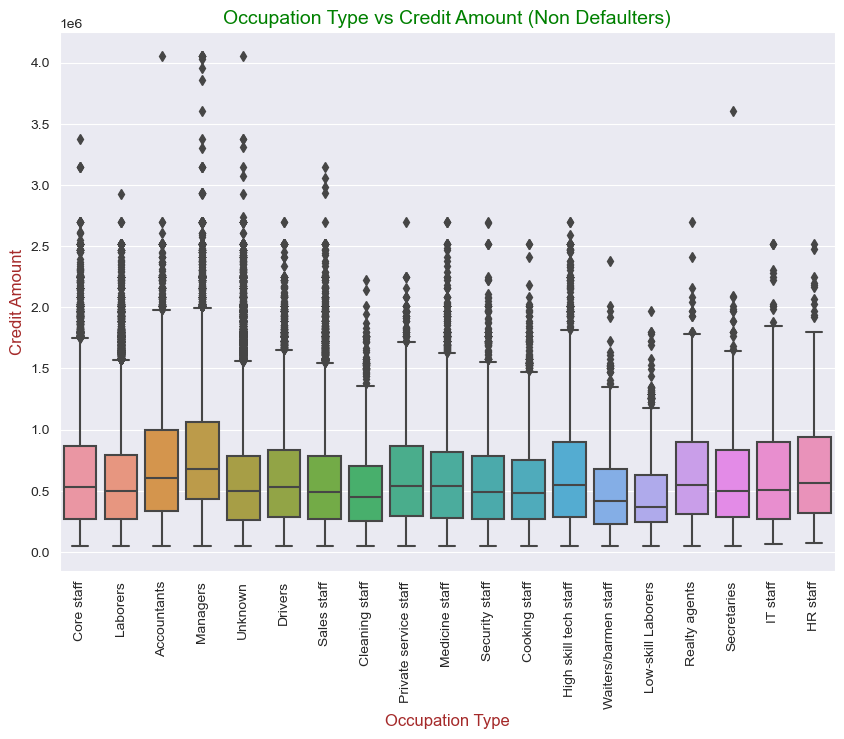

In [68]:
plt.figure(figsize=[10,7])
sns.boxplot(data=d,x='OCCUPATION_TYPE',y='AMT_CREDIT')
plt.xlabel("Occupation Type",fontsize=12,color='brown')
plt.ylabel("Credit Amount",fontsize=12,color='brown')
plt.title("Occupation Type vs Credit Amount (Defaulters)",fontsize=14,color='green')
plt.xticks(rotation=90)

plt.figure(figsize=[10,7])
sns.boxplot(data=nd,x='OCCUPATION_TYPE',y='AMT_CREDIT')
plt.xlabel("Occupation Type",fontsize=12,color='brown')
plt.ylabel("Credit Amount",fontsize=12,color='brown')
plt.title("Occupation Type vs Credit Amount (Non Defaulters)",fontsize=14,color='green')
plt.xticks(rotation=90)
plt.show()

Observations:
1. Accountants. Managers, Realtors, high skill tech staff and IT staff received higher credit amounts
2. 50% of the poeple in the above roles have taken higher loans


In [69]:
c1 = d.corr().loc[["CNT_CHILDREN","AMT_INCOME_TOTAL",'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','AGE','YEARS_EMPLOYED','YEARS_ID_PUBLISH'],["CNT_CHILDREN","AMT_INCOME_TOTAL",'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','AGE','YEARS_EMPLOYED','YEARS_ID_PUBLISH']]
c2 = nd.corr().loc[["CNT_CHILDREN","AMT_INCOME_TOTAL",'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','AGE','YEARS_EMPLOYED','YEARS_ID_PUBLISH'],["CNT_CHILDREN","AMT_INCOME_TOTAL",'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','AGE','YEARS_EMPLOYED','YEARS_ID_PUBLISH']]

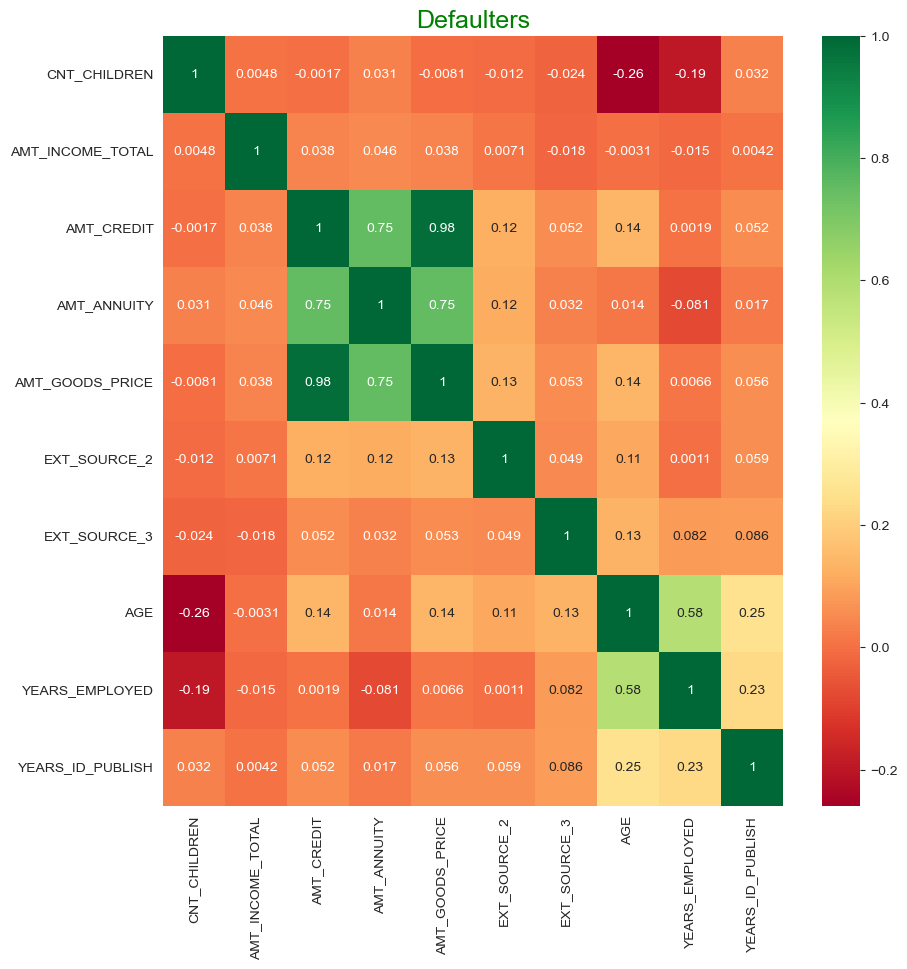

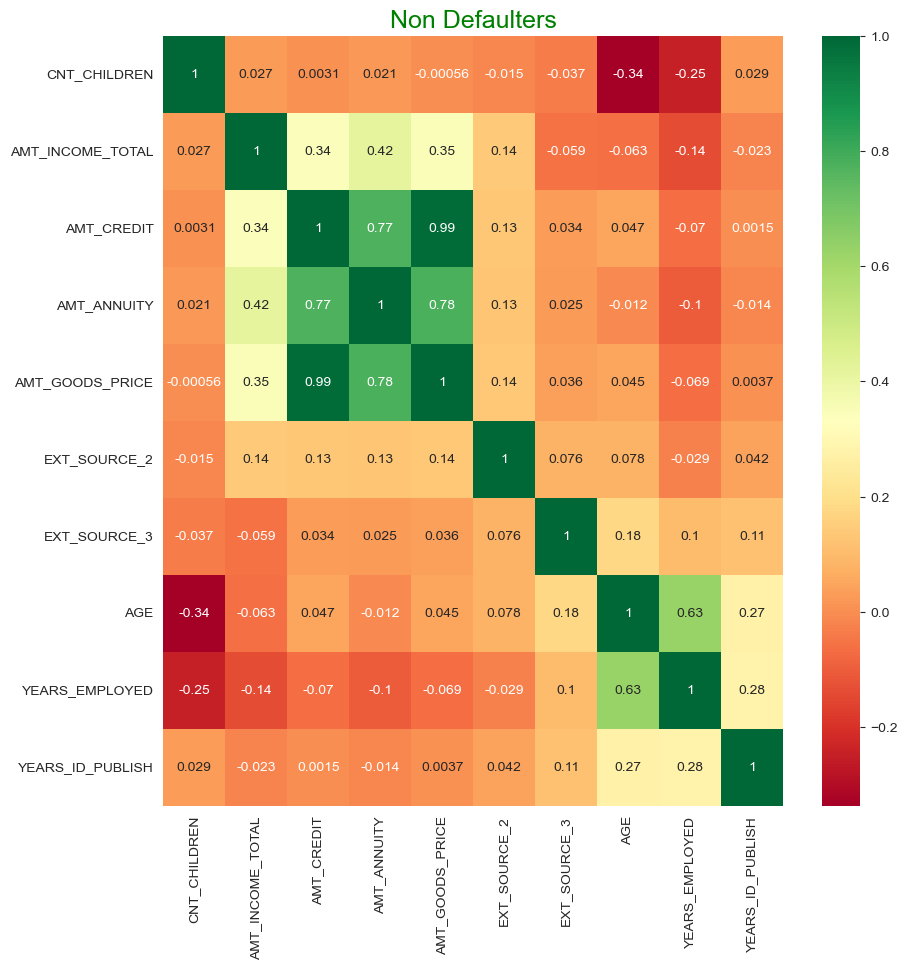

In [147]:
plt.figure(figsize=[10,10])
sns.heatmap(data=c1,cmap='RdYlGn',annot=True)
plt.title('Defaulters',fontsize=18,fontweight=5,color='green')

plt.figure(figsize=[10,10])
sns.heatmap(data=c2,cmap='RdYlGn',annot=True)
plt.title('Non Defaulters',fontsize=18,fontweight=5,color='green')

plt.show()

Observations
1. from the Non defaulters heatmap, we can observe that AMT_INCOME_TYPE and AMT_ANNUITY has some positive correlation
2. There is also some positive correlation between AMT_INCOME_TOTAL and AMT_CREDIT

### Let's work on Previous Application Dataset

In [71]:
papp = pd.read_csv('previous_application.csv',header=0)

Let's delete all the columns with null values more than 40%

In [72]:
dropp = papp.isna().sum()/len(app)>0.4

null_col2 = list(dropp[dropp==True].index)

papp.drop(columns=null_col2,axis=1,inplace=True)

In [73]:
papp.shape

(1670214, 23)

Let's impute the remaining missing values

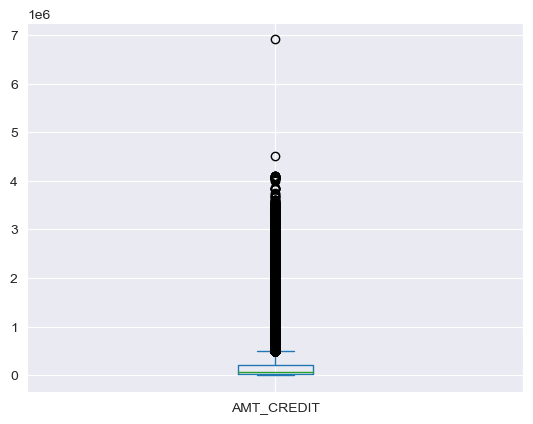

In [74]:
# It is better to impute median here since there are outliers

papp.AMT_CREDIT.plot.box()
plt.show()

In [75]:
print(papp.AMT_CREDIT.median())

papp.AMT_CREDIT.fillna(papp.AMT_CREDIT.median(),inplace=True)

80541.0


In [76]:
# Let's utilize mode to impute the null values here. In this case it is Cash

print(papp.PRODUCT_COMBINATION.mode())
papp.PRODUCT_COMBINATION.fillna('Cash',inplace=True)

0    Cash
Name: PRODUCT_COMBINATION, dtype: object


In [77]:
papp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670214 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

#### Correcting the values in each column

NAME_CONTRACT_TYPE

In [78]:
# Since the XNA constitues 0.000207%. Dropping them would'nt affect our analysis

print(papp.NAME_CONTRACT_TYPE.value_counts(normalize=True))
papp = papp[papp["NAME_CONTRACT_TYPE"]!='XNA']

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64


NAME_CASH_LOAN_PURPOSE

In [79]:
# Let's delete the rows that has XNA and XAP

papp=papp.drop(papp[papp['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
papp=papp.drop(papp[papp['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
papp=papp.drop(papp[papp['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

Let's merge the Dataset

In [80]:
final_data = app.merge(papp,on='SK_ID_CURR',how='inner')

In [81]:
final_data.shape

(59413, 54)

In [82]:
#Let's remove the unwanted columns from the final_data datset

unwanted_cols = ['SK_ID_CURR','SK_ID_PREV','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [83]:
final_data.drop(columns=unwanted_cols,inplace=True)

In [84]:
final_data.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH,income_range,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Working,Higher education,Single / not married,With parents,0.030755,Laborers,Business Entity Type 3,0.502779,0.510000,0.0,0.0,0.0,0.0,0.0,1.0,28.331507,2.767123,8.260274,50000-100000,Cash loans,94500.0,109971.0,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,Unknown,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,1.0,0.0,5.0,41.863014,7.309589,10.375342,250000-300000,Cash loans,1260000.0,1260000.0,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,Drivers,Self-employed,0.321745,0.411849,0.0,0.0,0.0,0.0,1.0,1.0,32.038356,5.643836,9.745205,350000-400000,Cash loans,1350000.0,1487214.0,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal,Cash Street: low
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,Managers,Business Entity Type 3,0.738053,0.605836,0.0,0.0,0.0,1.0,0.0,1.0,44.180822,4.824658,11.758904,150000-200000,Cash loans,337500.0,407911.5,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,Managers,Business Entity Type 3,0.738053,0.605836,0.0,0.0,0.0,1.0,0.0,1.0,44.180822,4.824658,11.758904,150000-200000,Cash loans,450000.0,555723.0,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low


### Univariate Analysis

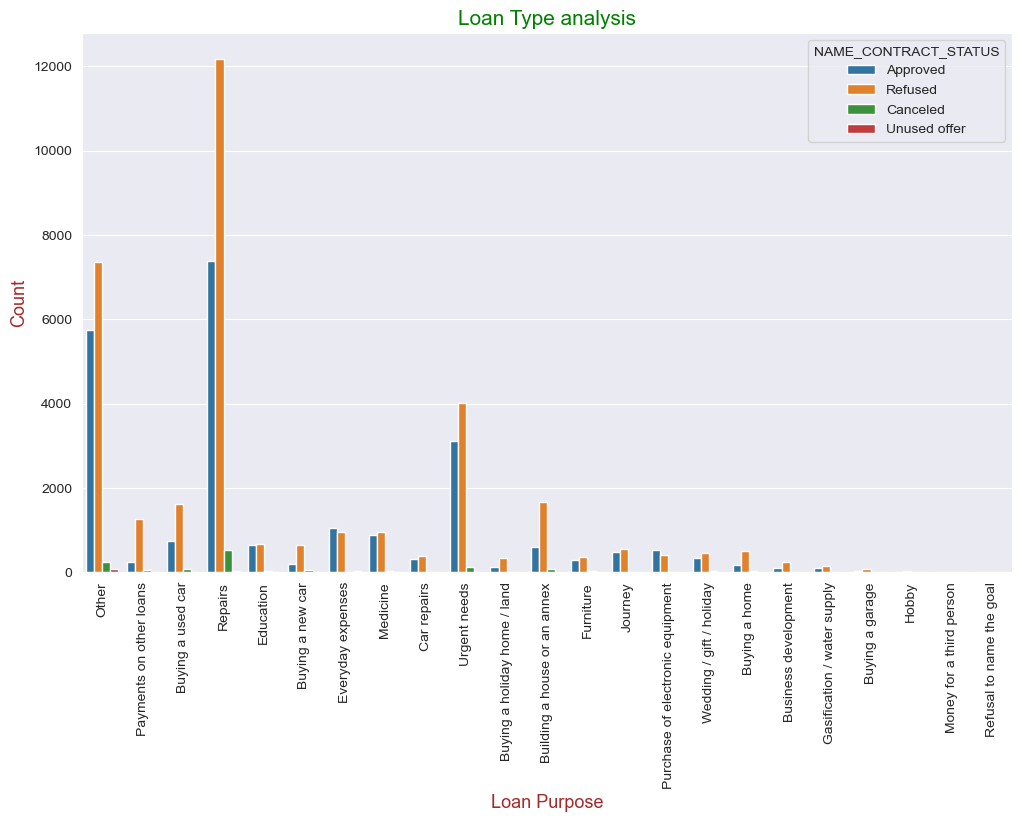

In [85]:
plt.figure(figsize=[12,7])
sns.countplot(data=final_data,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.xlabel("Loan Purpose",fontsize=13,color='brown')
plt.ylabel("Count",fontsize=13,color='brown')
plt.title("Loan Type analysis",fontsize=15,color='green')
plt.show()

Conclusion:
1. Loans were rejected the most for Repairs and unspecified category
2. For Everyday expenses loans were approved more than rejected
3. For education, loans approved and rejected are almost equal

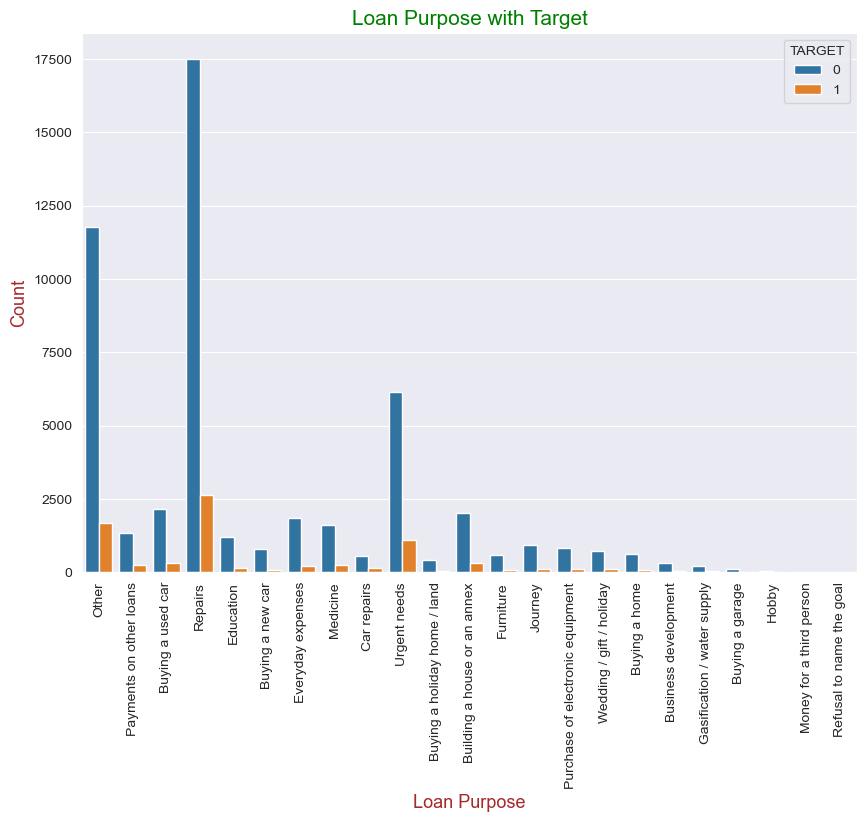

In [145]:
plt.figure(figsize=[10,7])
sns.countplot(data=final_data,x='NAME_CASH_LOAN_PURPOSE',hue='TARGET')
plt.ylabel("Count",fontsize=13,color='brown')
plt.xlabel("Loan Purpose",fontsize=13,color='brown')
plt.title("Loan Purpose with Target",fontsize=15,color='green')
plt.xticks(rotation=90)
plt.savefig(fname='Loan Type with Target')
plt.show()

Conclusions:
1. People taking loans for Repairs category tend to have payment difficulties

### MultiVariate Analysis

In [87]:
final_corr = final_data.corr()

In [88]:
final_corr

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH,AMT_APPLICATION,AMT_CREDIT_y,DAYS_DECISION,SELLERPLACE_AREA
TARGET,1.000000,0.026986,-0.026427,-0.027218,-0.003956,-0.036383,-0.057820,-0.177645,-0.191423,0.000175,0.004066,-0.003909,-0.026527,0.005153,-0.015013,-0.062355,-0.046332,-0.053579,-0.031367,-0.025996,0.062798,0.020981
CNT_CHILDREN,0.026986,1.000000,0.009053,-0.016196,0.015741,-0.019520,-0.017921,-0.024579,-0.051264,-0.003503,-0.009965,0.010412,-0.021309,-0.013531,-0.026081,-0.353676,-0.203497,0.027380,0.033574,0.037756,0.062669,0.007215
AMT_INCOME_TOTAL,-0.026427,0.009053,1.000000,0.363042,0.443971,0.366735,0.189405,0.153226,-0.077275,0.014164,0.009699,0.003800,0.073327,0.030321,0.036615,-0.011666,-0.107984,-0.008055,0.306851,0.301695,-0.049443,-0.020708
AMT_CREDIT_x,-0.027218,-0.016196,0.363042,1.000000,0.746824,0.985304,0.112257,0.117516,0.025327,-0.002823,0.012062,-0.012344,0.074088,0.014394,-0.034565,0.085063,-0.021177,-0.004583,0.222564,0.218161,-0.093933,-0.016106
AMT_ANNUITY,-0.003956,0.015741,0.443971,0.746824,1.000000,0.748064,0.126018,0.110595,0.006045,0.004383,0.007767,0.011742,0.042944,-0.018650,-0.010863,-0.001328,-0.076153,-0.025651,0.201039,0.198165,-0.086098,-0.016414
AMT_GOODS_PRICE,-0.036383,-0.019520,0.366735,0.985304,0.748064,1.000000,0.115316,0.124636,0.031051,-0.001363,0.011246,-0.011211,0.081382,0.013856,-0.035575,0.081346,-0.018310,-0.002747,0.231888,0.225210,-0.098786,-0.014365
REGION_POPULATION_RELATIVE,-0.057820,-0.017921,0.189405,0.112257,0.126018,0.115316,1.000000,0.204687,0.002473,0.014777,-0.003915,-0.001034,0.096371,0.004207,0.005179,0.059097,0.006425,0.015887,0.064143,0.063137,-0.108504,-0.026083
EXT_SOURCE_2,-0.177645,-0.024579,0.153226,0.117516,0.110595,0.124636,0.204687,1.000000,0.103237,-0.006260,-0.005400,0.002958,0.069503,-0.012597,-0.006468,0.117268,-0.007514,0.045114,0.075951,0.072393,-0.101020,-0.016546
EXT_SOURCE_3,-0.191423,-0.051264,-0.077275,0.025327,0.006045,0.031051,0.002473,0.103237,1.000000,0.004629,-0.008402,-0.027958,-0.022546,-0.078103,-0.089468,0.138959,0.081747,0.076399,-0.048006,-0.054584,-0.120336,-0.008286
AMT_REQ_CREDIT_BUREAU_HOUR,0.000175,-0.003503,0.014164,-0.002823,0.004383,-0.001363,0.014777,-0.006260,0.004629,1.000000,0.130645,0.001676,0.001496,0.016329,-0.000504,-0.006839,-0.003897,0.009031,0.016012,0.014681,-0.003613,-0.002334


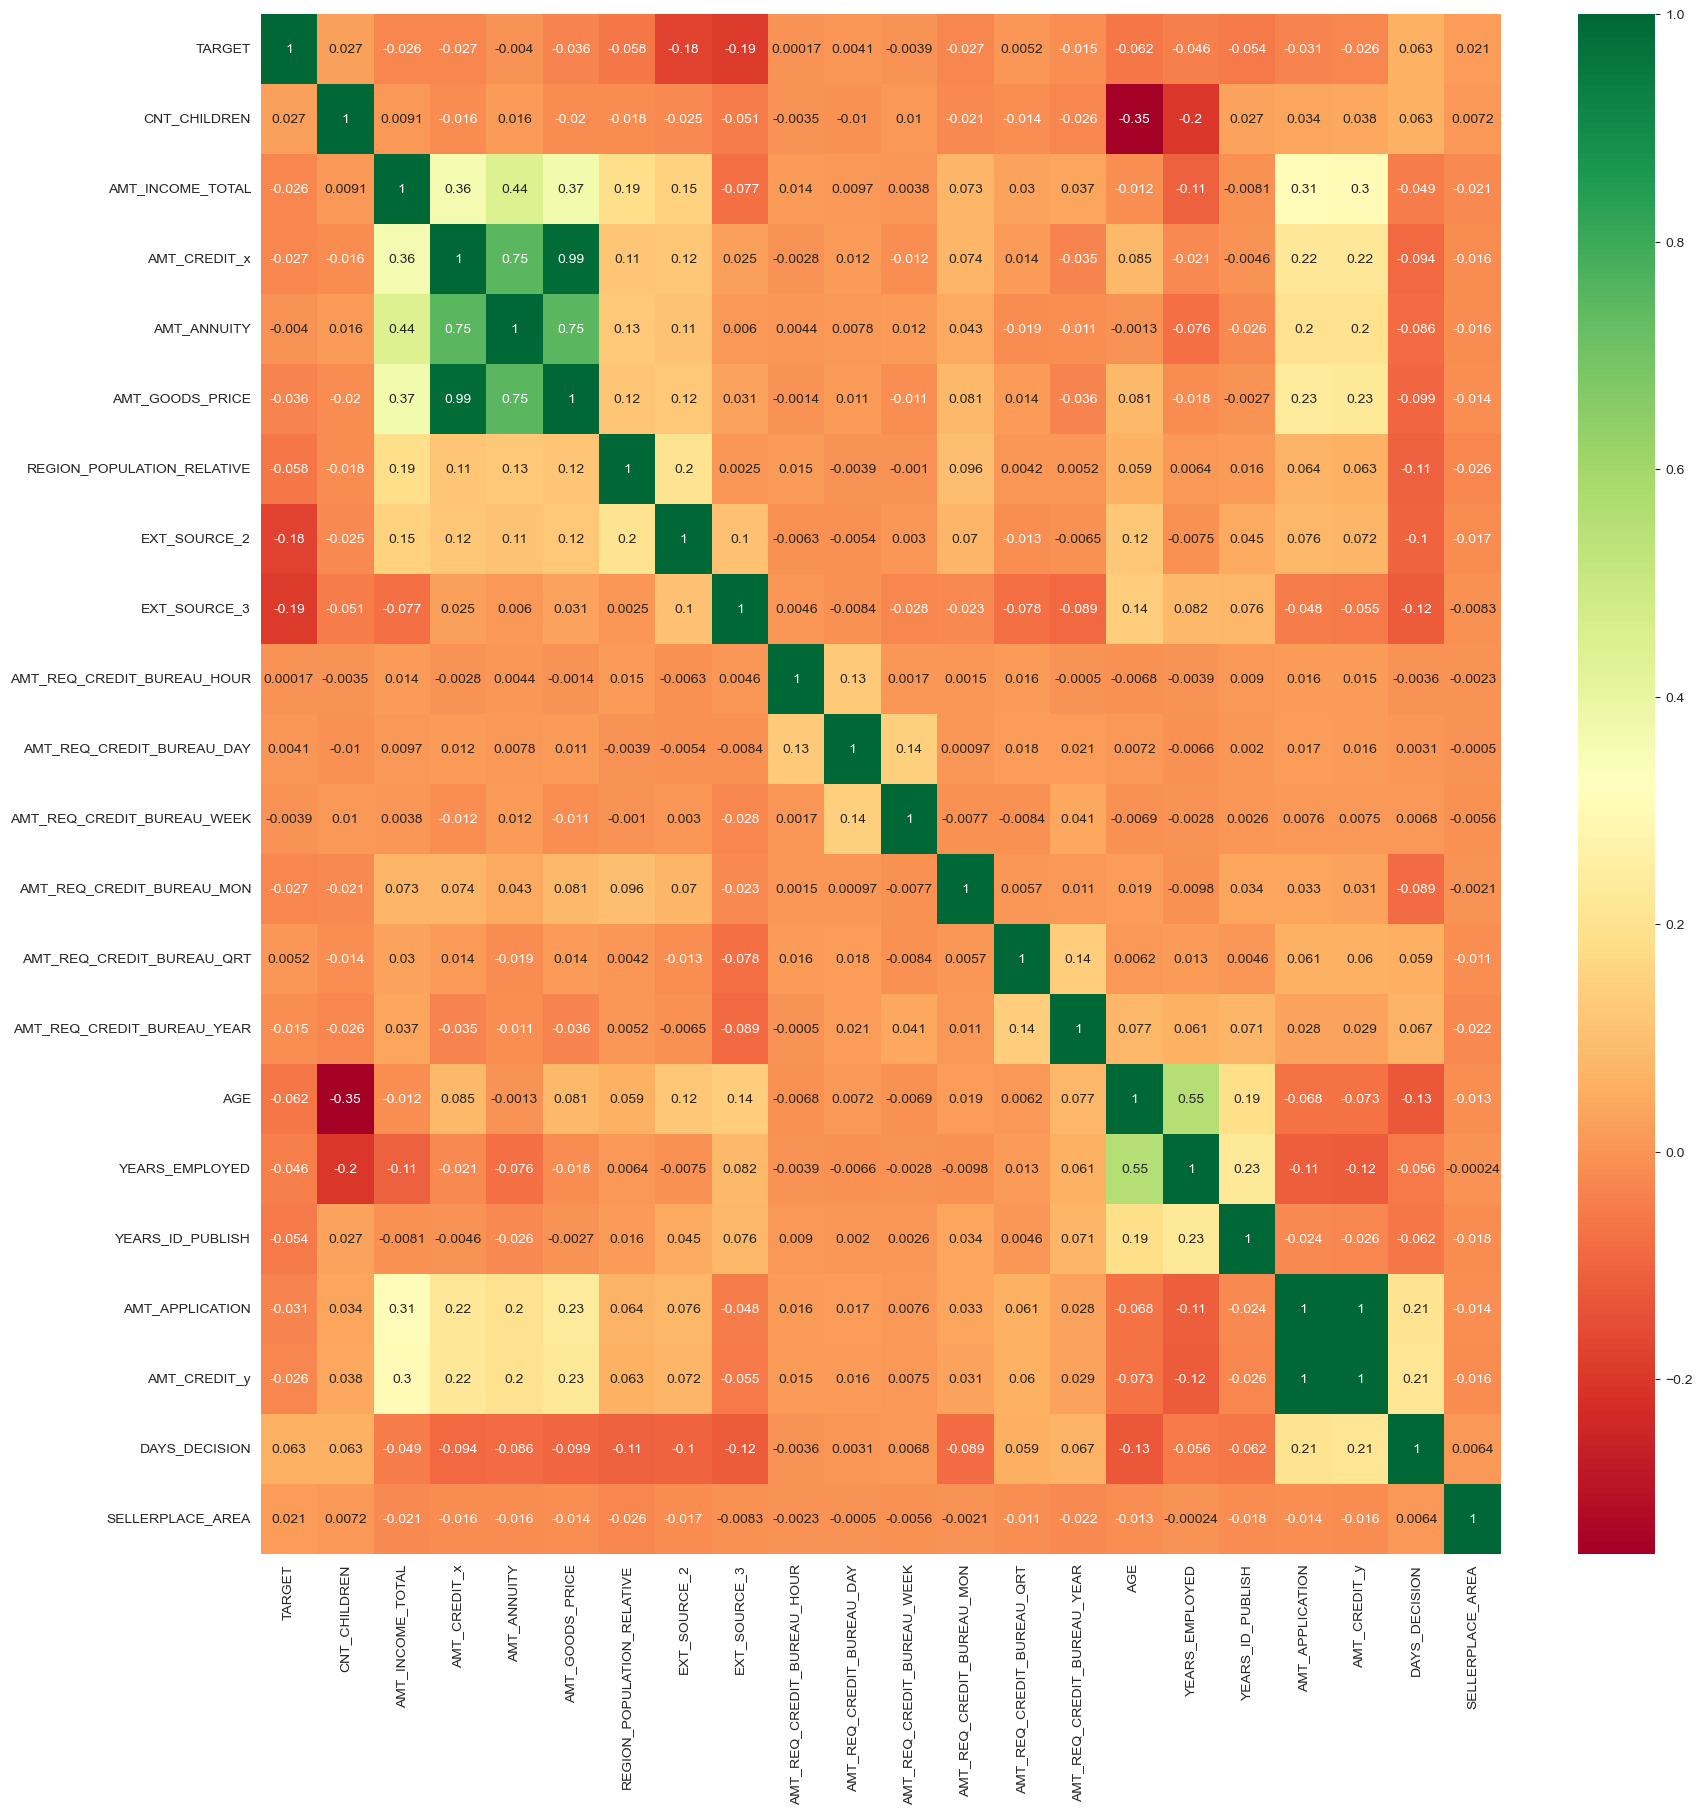

In [96]:
plt.figure(figsize=[20,20])
sns.heatmap(data=final_corr,cmap='RdYlGn',annot=True)
plt.show()

### Final Conclusion
#### 1.Application dataset contains 92% of Non default and 8% of Default 
#### 2. Majority of loan applicants are working
#### 3. Most of the Loan applicants have completed their Secondary / Secondary special education
#### 4. Clients with higher income range i.e 4000000 and above are less likely to be defaulters
#### 5. Married clients are likely to default and widowed clients are less likely to default
#### 6. Most defaulters live in a House /Apartment 
#### 7. Defaulters percentage is higher in males than females
#### 8. Banks should focus on clients aged 40 to 60 as they are the highest non defaulters
#### 9. Clients with an academic degree must be preferred
#### 10. Repairs category in Loan purpose to be avoided as they have highest number of unsuccessful payments
#### 11. Clients obtaining Car loans, New house loans and Education loans are less likely to default
#### 12. Managers, Accountants and High skill tech staff are the least defaulters, however the variation in credit amount is higher in                    this case. Hence banks should pay more attention to these kind of applications
#### 13. Newly married couples or people with 0 children count are most likely to be defaulters